# imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import wbdata
import matplotlib.pyplot as plt
import scipy.stats as st
from sympy import *
import time as dt
import warnings
from IPython.display import Math,Latex
from pandas.errors import SettingWithCopyWarning

from sklearn.linear_model import LinearRegression
from statsmodels.api import *
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler

from scipy.stats import jarque_bera, kstest, kstwobign

from country_dict import *

# Возьмем данные из библиотеки `wbdata`

In [2]:
country = 'IND'
indicators = {
    #'NY.'Inflation rate'.DEFL.KD.ZG': 'Inflation rate',
    'FP.CPI.TOTL': 'Inflation rate',
    'SL.UEM.TOTL.ZS': 'Unemployment rate',
}
data = wbdata.get_dataframe(indicators, country=country )

data = data.dropna().sort_values('date')

display(data)

,Inflation rate,Unemployment rate
date,,
1991,26.132091,6.850
1992,29.212495,6.853
1993,31.060737,6.859
1994,34.243821,6.828
1995,37.745213,6.990
1996,41.133658,7.147
1997,44.080577,7.335
1998,49.912808,7.517
1999,52.243646,7.682


# Стандартизируем полученные данные

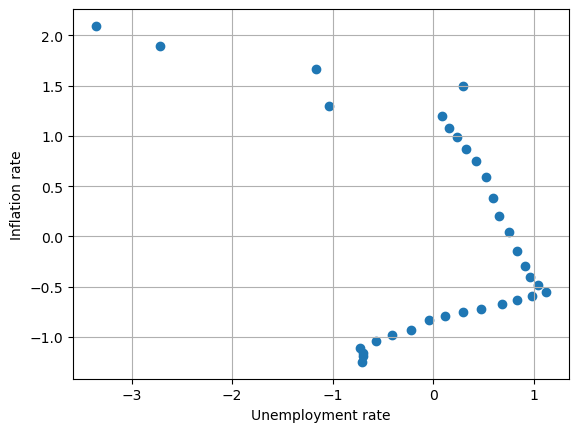

In [3]:
s=StandardScaler()
x=s.fit_transform(data[['Unemployment rate']])
s=StandardScaler()
y=s.fit_transform(data[['Inflation rate']])


plt.xlabel('Unemployment rate')
plt.ylabel('Inflation rate')
plt.grid()
plt.scatter(x,y)

plt.show()

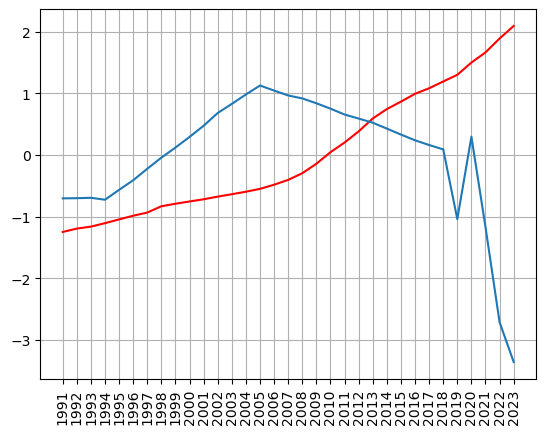

In [4]:
plt.plot(data.index,y,color='r')
plt.plot(data.index,x)
plt.xticks(rotation=90)
plt.grid()
plt.show()

# построим модель линейной регрессии

In [5]:
x1 = add_constant(x)
model = OLS(y,x1).fit()

# Построим модель гиперболической функции

In [6]:
x1 = add_constant(x)
x1 = x1/x
model = OLS(y,x1).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.063
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0900
Time:                        14:13:51   Log-Likelihood:                -45.270
No. Observations:                  33   AIC:                             94.54
Df Residuals:                      31   BIC:                             97.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0578      0.033      1.750      0.090      -0.010       0.125
const         -0.0329      0.172     -0.191      0.850      -0.384       0.319
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   0.198
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                2.969
Skew:                           0.655   Prob(JB):                        0.227
Kurtosis:                       2.336   Cond. No.                         5.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как видно, гиперболическая функция еще хуже описывает ситуацию

# Попробуем совершить полиномиальные преобразования

(0, 0.0)

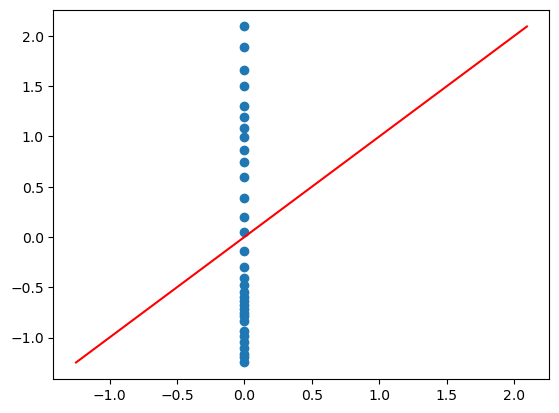

(1, 0.1494253811397146)

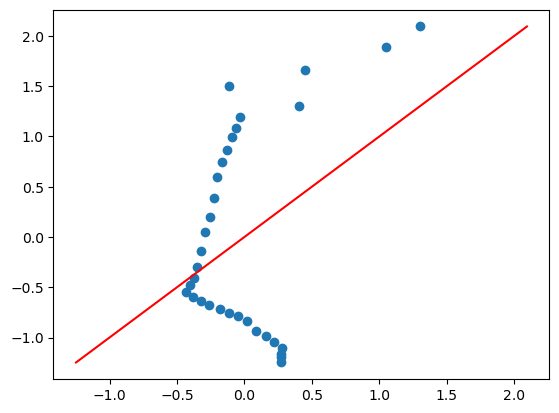

(2, 0.1494253811397146)

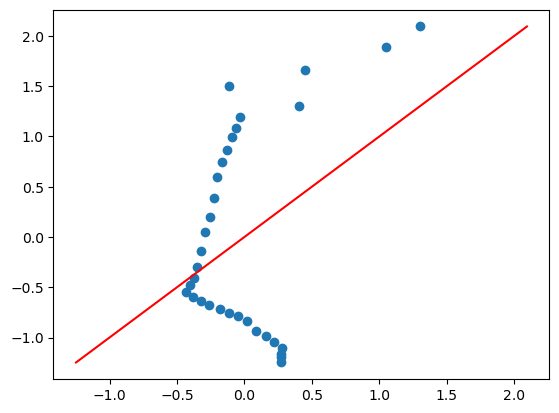

(3, 0.1494253811397146)

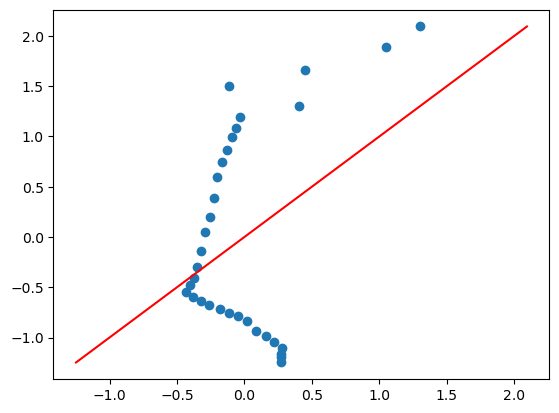

(4, 0.1494253811397146)

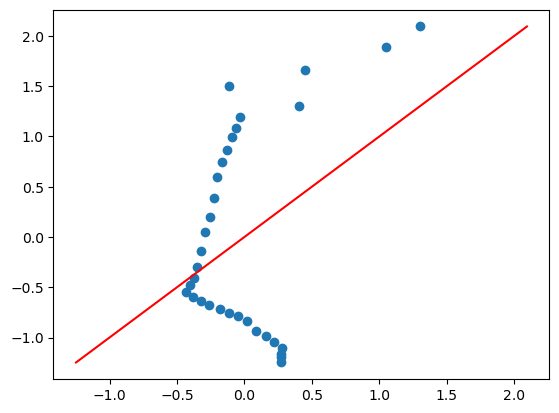

(5, 0.1494253811397146)

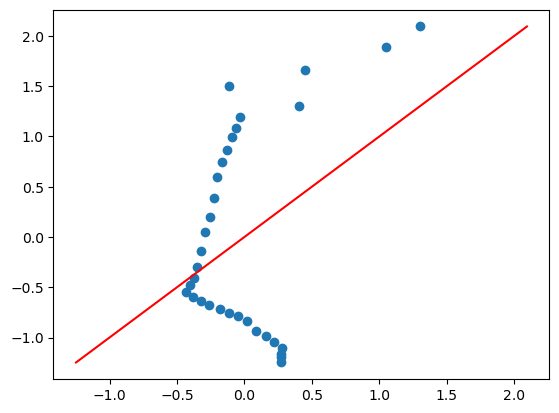

(6, 0.1494253811397146)

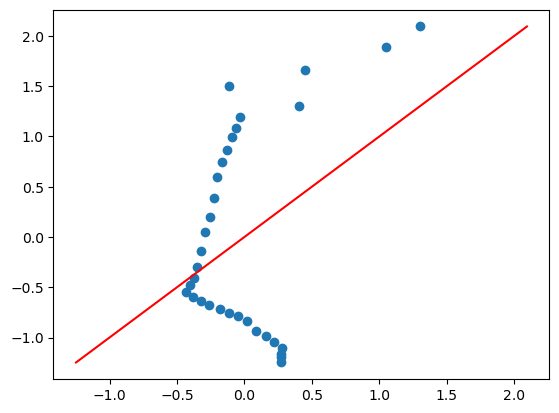

(7, 0.1494253811397146)

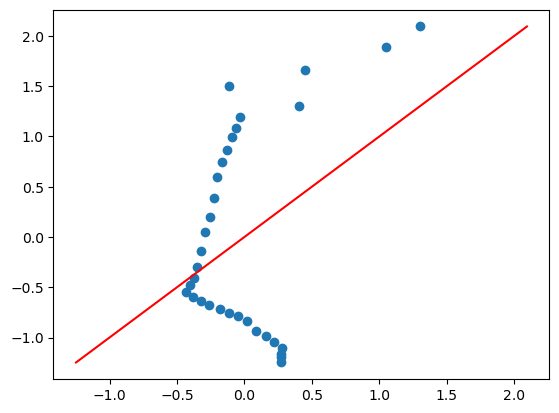

(8, 0.1494253811397146)

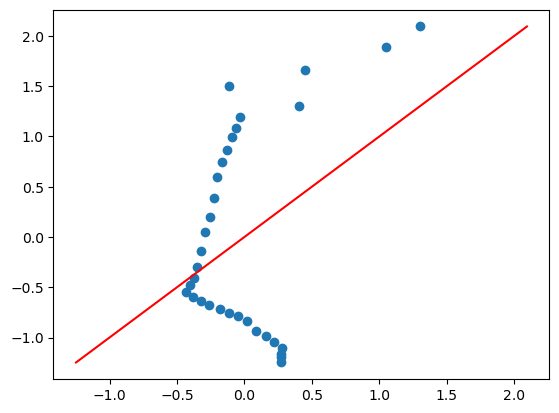

(9, 0.1494253811397146)

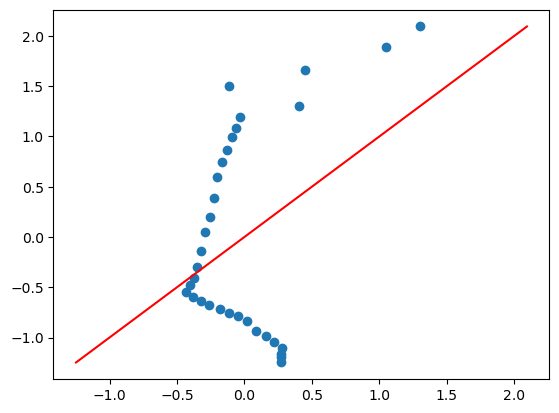

(10, 0.1494253811397146)

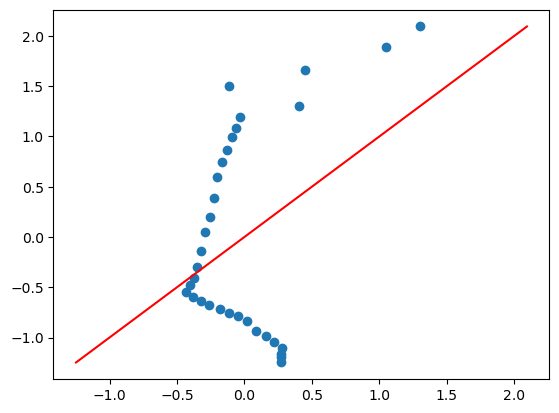

(11, 0.1494253811397146)

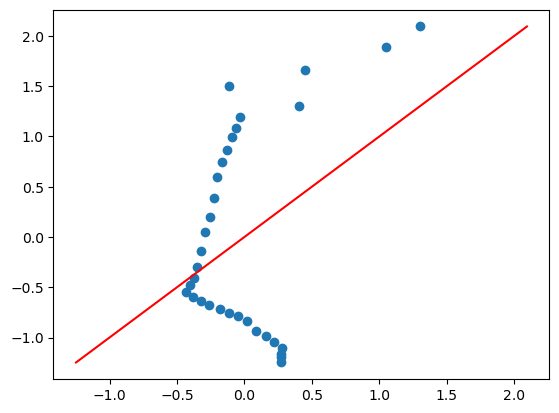

(12, 0.1494253811397146)

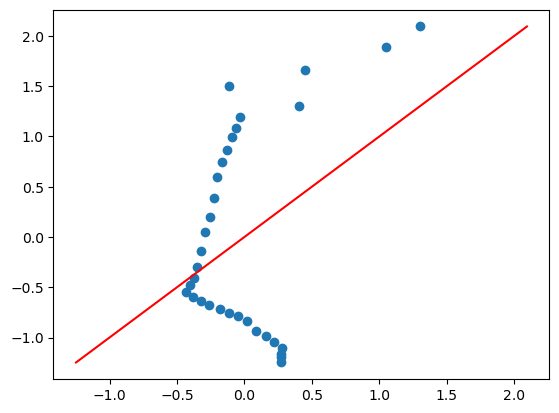

(13, 0.1494253811397146)

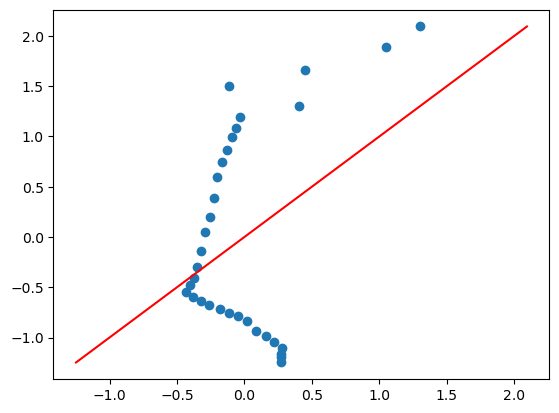

(14, 0.1494253811397146)

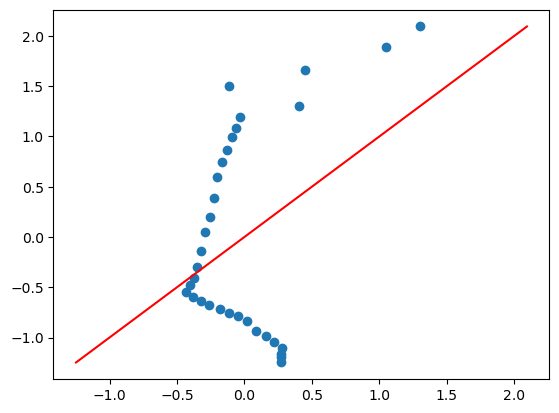

(15, 0.1494253811397146)

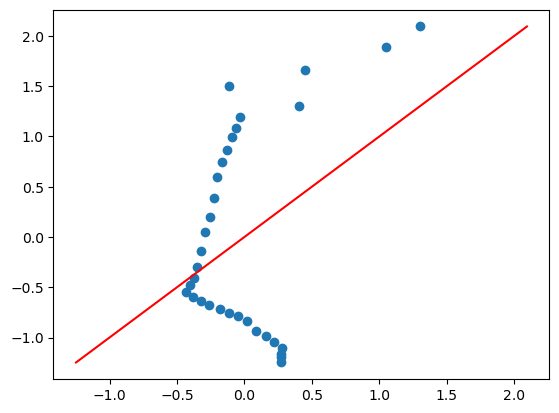

(16, 0.1494253811397146)

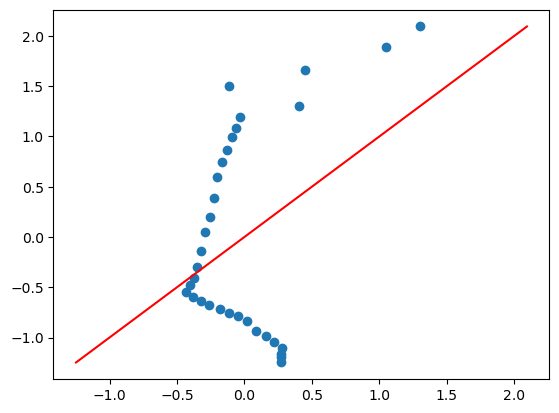

(17, 0.1494253811397146)

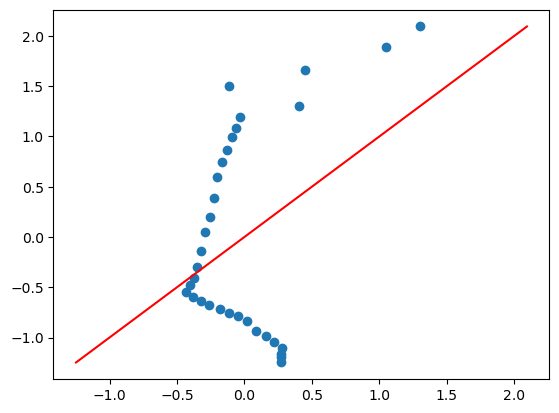

(18, 0.1494253811397146)

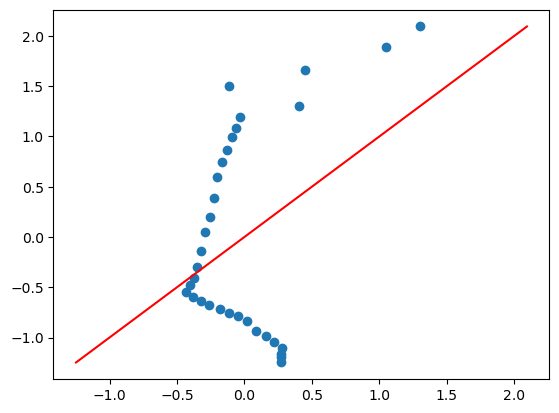

(19, 0.1494253811397146)

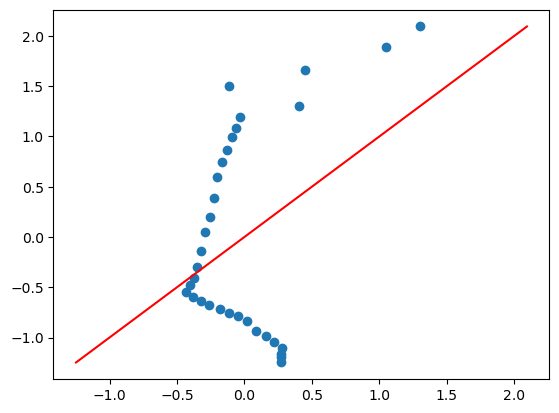

(20, 0.1494253811397146)

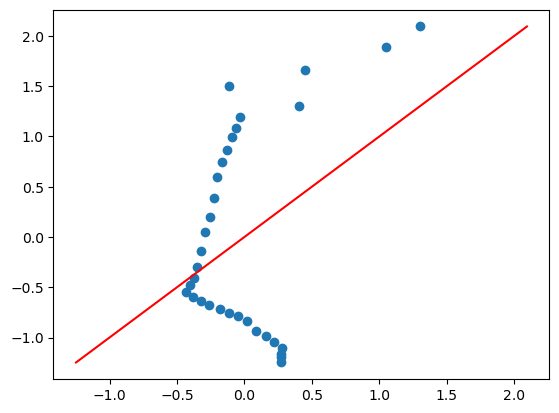

(21, 0.1494253811397146)

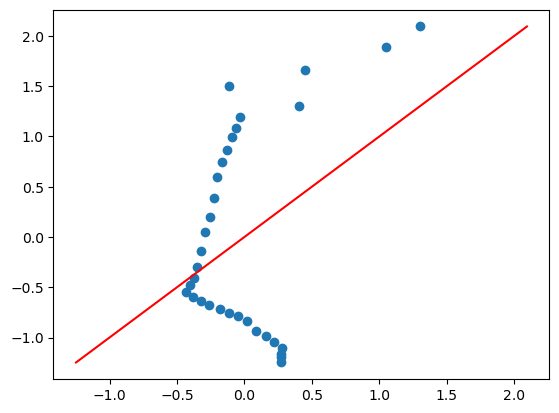

(22, 0.1494253811397146)

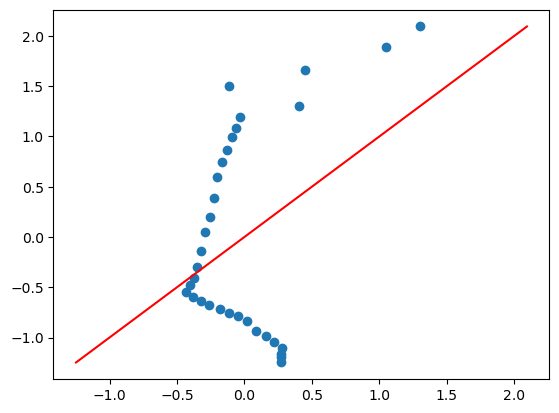

(23, 0.1494253811397146)

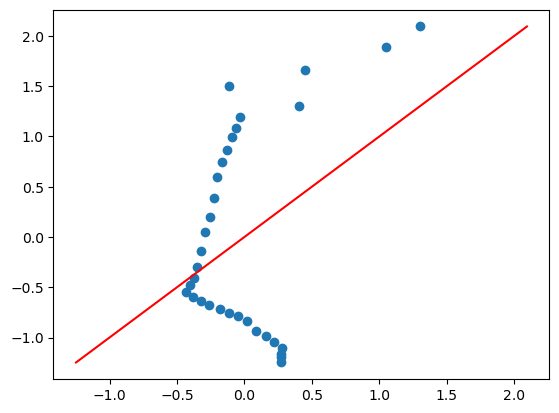

(24, 0.1494253811397146)

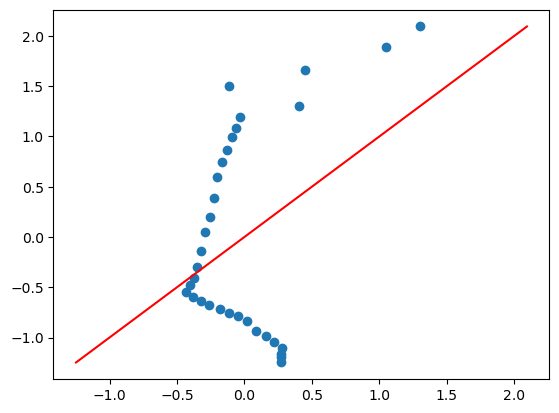

(25, 0.1494253811397146)

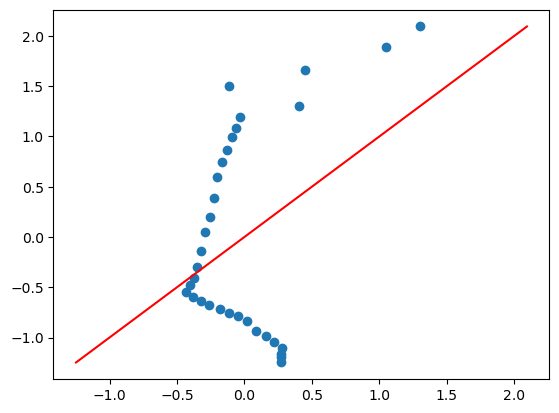

(26, 0.1494253811397146)

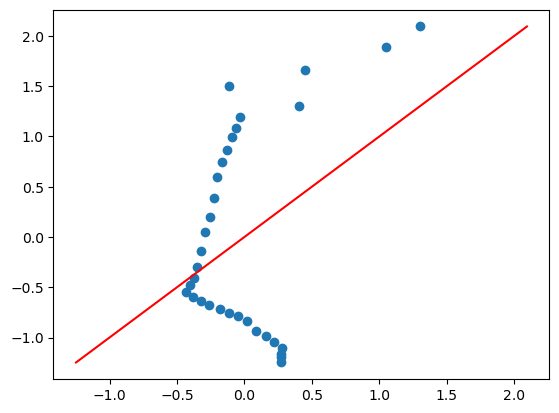

In [7]:
deg =0 

r=0
while round(r,3)<=0.95:
        xp=x
        pf = PolynomialFeatures(degree=deg,interaction_only=True)
        xp = pf.fit_transform(xp)
        
        model = OLS(y,xp).fit()
        
        display((deg, model.rsquared))
        plt.scatter(model.predict(xp), y)
        plt.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='red')
        
        plt.show()
        deg +=1
        r = model.rsquared
        
        if deg==27:
                break
else:
        xp=x
        pf = PolynomialFeatures(degree=deg)
        xp = pf.fit_transform(xp)
        
        model = OLS(y,xp).fit()
        
        display((deg, model.rsquared))
        plt.scatter(model.predict(xp), y)
        plt.plot([np.min(y),np.max(y)],[np.min(y),np.max(y)],color='red')
        
        plt.show()

# Все равно R2 мал. 

# Если смотреть на график распределения под углом в 90 градусов, то можно предположить, что это полином степени N

(0, 0.0)

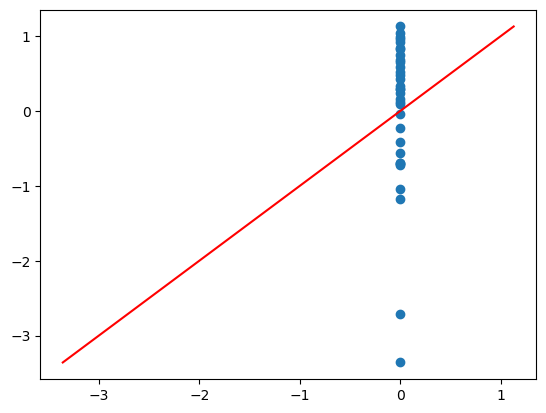

(1, 0.14942538113971482)

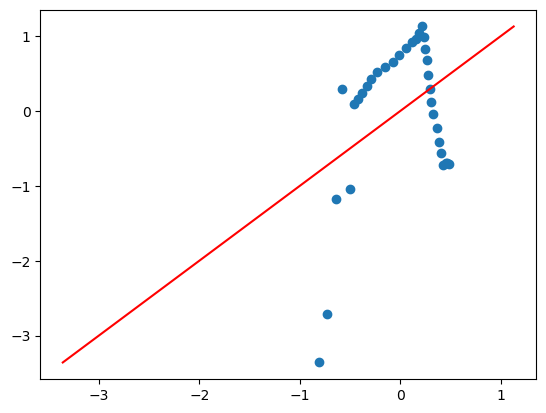

(2, 0.8764764727088026)

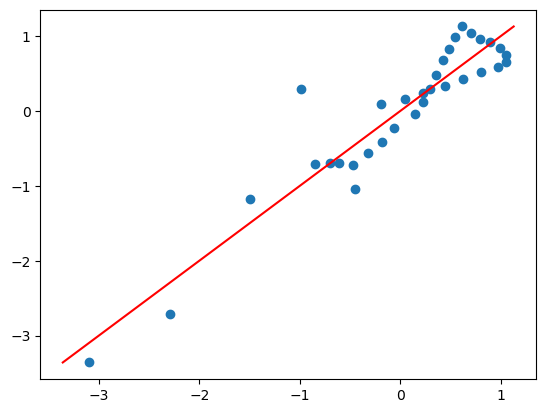

(3, 0.8765332966262207)

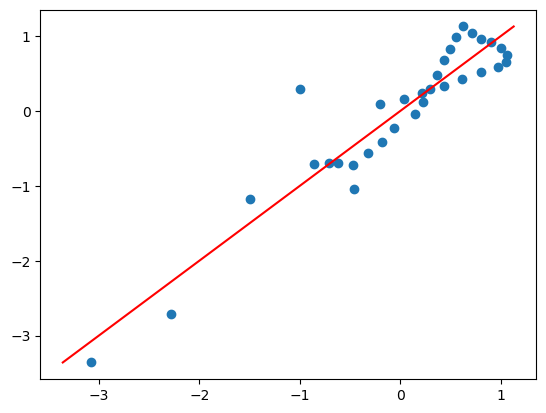

(4, 0.9051131049491657)

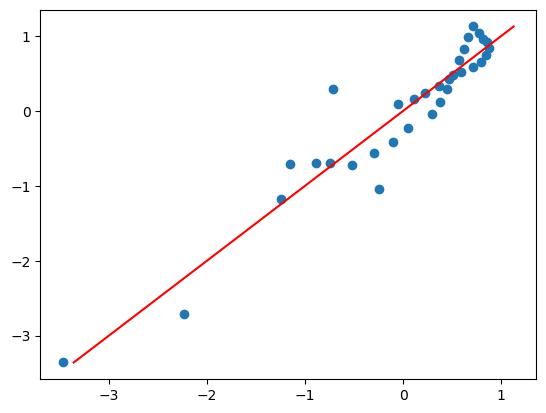

(5, 0.9137709892888027)

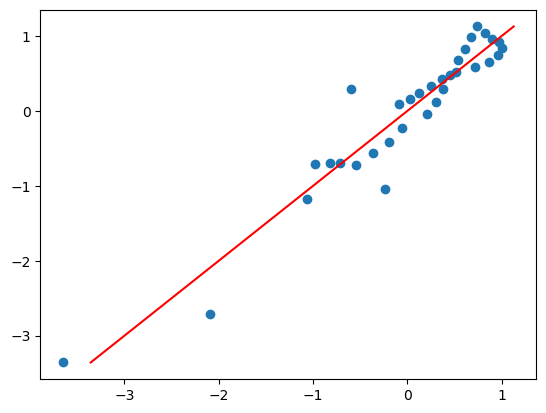

(6, 0.9342348798083643)

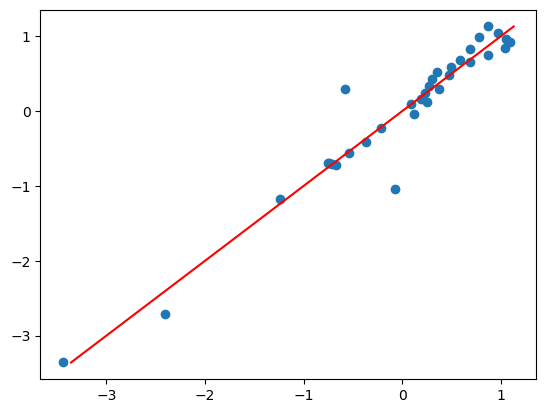

(7, 0.9348023722645122)

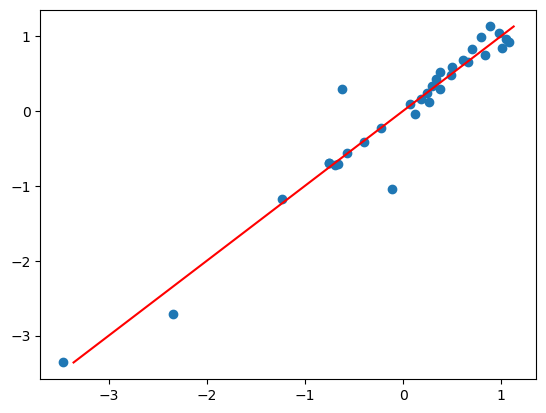

(8, 0.9414203723098807)

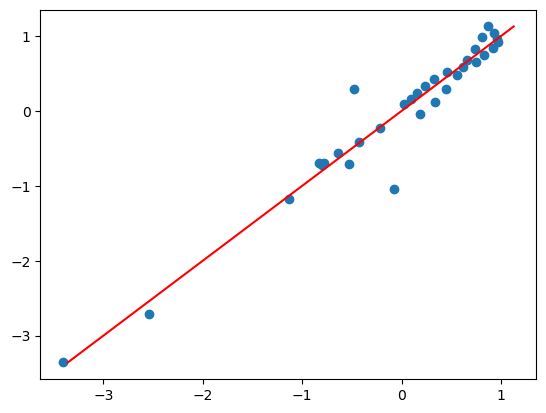

(9, 0.9561057524024582)

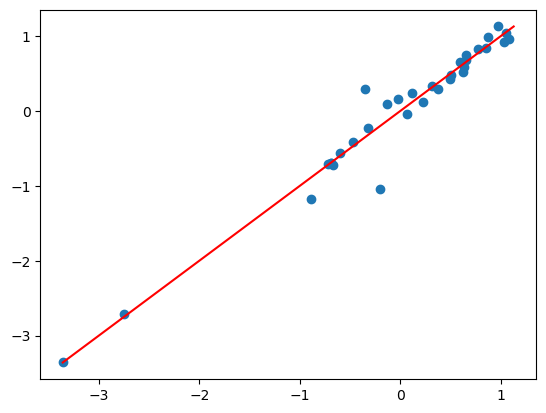

(10, 0.9561780783770254)

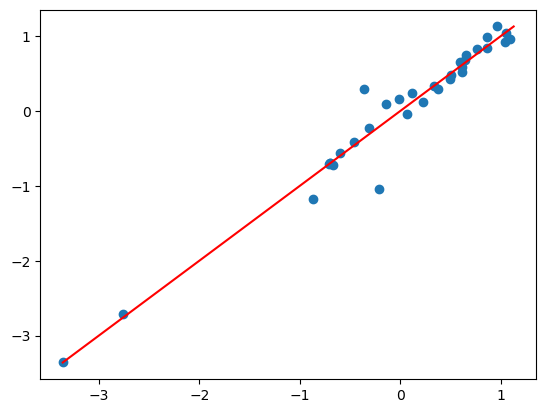

(11, 0.9562677771295557)

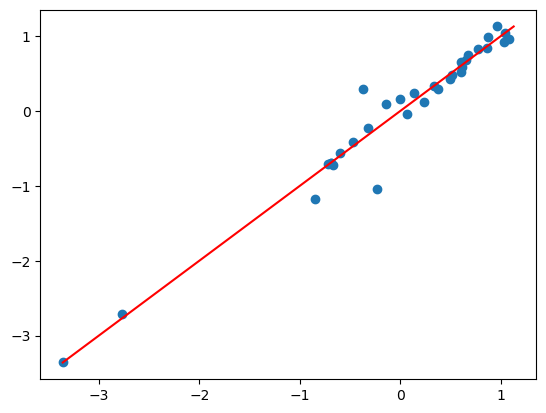

(12, 0.9568974230448053)

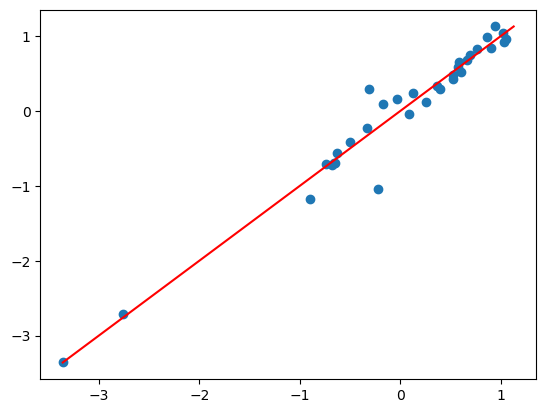

(13, 0.969899049060189)

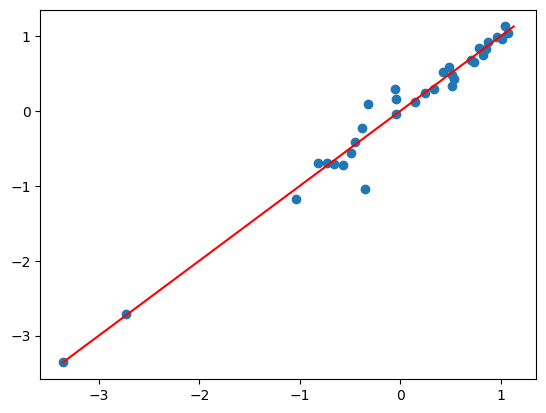

(14, 0.9772255795853088)

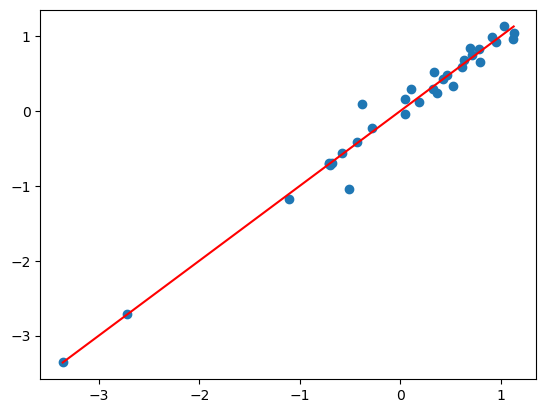

(15, 0.9821042787757426)

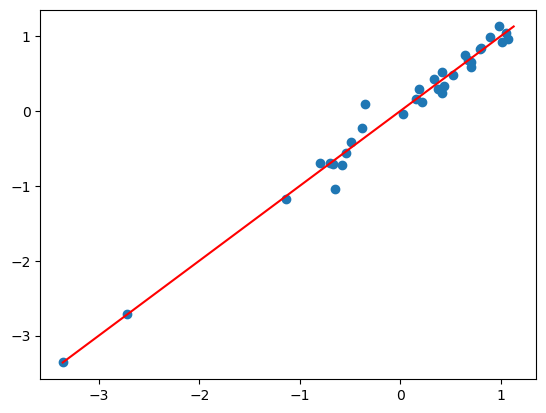

(16, 0.99364633885899)

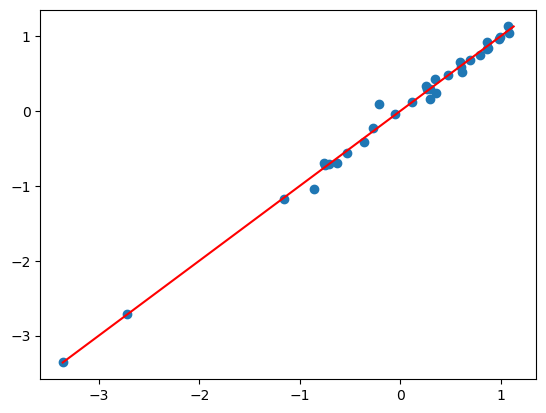

(17, 0.9954235140441796)

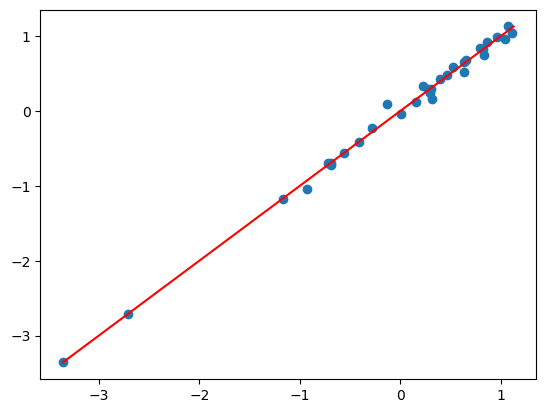

(18, 0.9972140942639199)

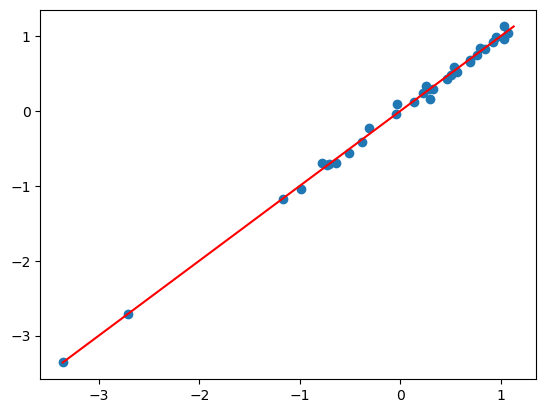

(19, 0.9993326216025015)

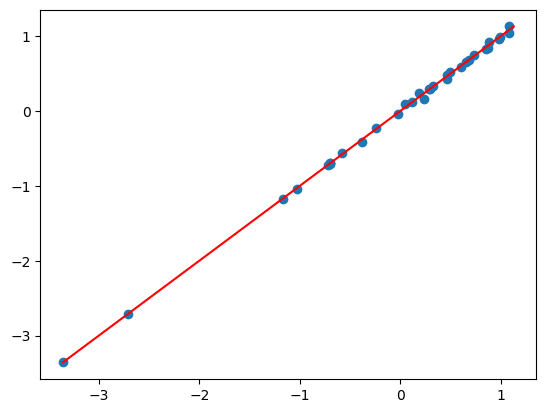

(20, 0.9993778646879388)

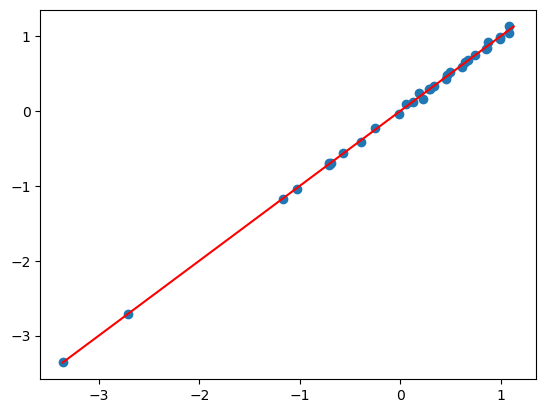

(21, 0.9996207901638734)

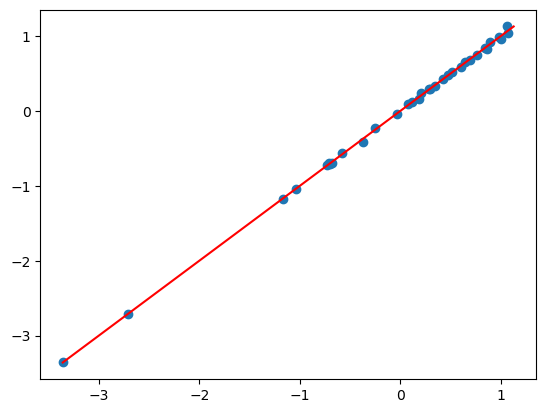

(22, 0.999740505545667)

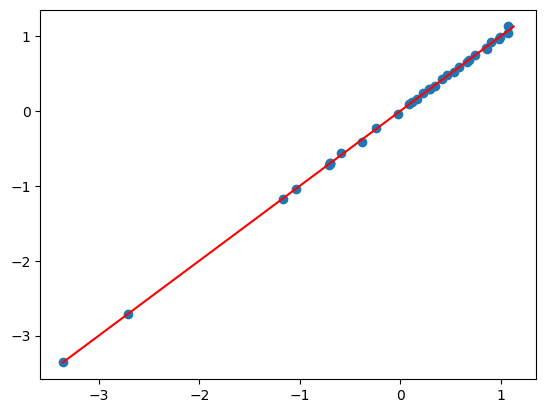

In [8]:
deg =0 
r=0
while round(r, 3)<=0.9999:
        yp=y
        pf = PolynomialFeatures(degree=deg)
        yp = pf.fit_transform(yp)
        
        model = OLS(x,yp).fit()
        
        display((deg, model.rsquared))
        plt.scatter(model.predict(yp), x)
        plt.plot([np.min(x),np.max(x)],[np.min(x),np.max(x)],color='red')
        
        plt.show()
        
        deg +=1
        r = model.rsquared
        if deg==27:
                break
else:
        yp=y
        pf = PolynomialFeatures(degree=deg)
        yp = pf.fit_transform(yp)
        
        model = OLS(x,yp).fit()
        
        display((deg, model.rsquared))
        plt.scatter(model.predict(yp), x)
        plt.plot([np.min(x),np.max(x)],[np.min(x),np.max(x)],color='red')

        
        plt.show()

# Мы нашли модель со `R2 = 0.999780516437845`

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1751.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           3.53e-15
Time:                        14:13:54   Log-Likelihood:                 89.412
No. Observations:                  33   AIC:                            -132.8
Df Residuals:                      10   BIC:                            -98.40
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7685      0.029     26.386      0.000       0.704       0.833
x1            -0.5988      0.222     -2.696      0.022      -1.094      -0.104
x2             0.5506      1.676      0.328      0.749      -3.184       4.285
x3             2.6544      5.522      0.481      0.641      -9.649      14.958
x4           -21.8491     25.853     -0.845      0.418     -79.453      35.755
x5           -12.8174     50.002     -0.256      0.803    -124.229      98.594
x6           238.3616    173.507      1.374      0.200    -148.237     624.960
x7           -58.4569    222.095     -0.263      0.798    -553.315     436.401
x8         -1074.6661    628.149     -1.711      0.118   -2474.269     324.936
x9           598.3061    561.791      1.065      0.312    -653.443    1850.055
x10         2452.3267   1353.758      1.811      0.100    -564.034    5468.688
x11        -1769.2915    899.013     -1.968      0.077   -3772.417     233.834
x12        -3150.8095   1810.891     -1.740      0.112   -7185.727     884.108
x13         2674.5114   1003.989      2.664      0.024     437.485    4911.538
x14         2326.4062   1504.520      1.546      0.153   -1025.873    5678.685
x15        -2326.3993    821.978     -2.830      0.018   -4157.882    -494.917
x16         -912.2524    738.821     -1.235      0.245   -2558.448     733.943
x17         1179.5600    459.938      2.565      0.028     154.755    2204.365
x18          120.0885    182.499      0.658      0.525    -286.545     526.722
x19         -324.6971    149.873     -2.166      0.055    -658.634       9.240
x20           29.4328     12.711      2.315      0.043       1.110      57.756
x21           37.5551     20.966      1.791      0.104      -9.161      84.271
x22           -8.4640      3.941     -2.148      0.057     -17.244       0.316
==============================================================================
Omnibus:                       11.606   Durbin-Watson:                   2.929
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.612
Skew:                           0.925   Prob(JB):                      0.00111
Kurtosis:                       5.545   Cond. No.                     1.37e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.1e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Тестируем

# Проверим остатки на нормальность визуально

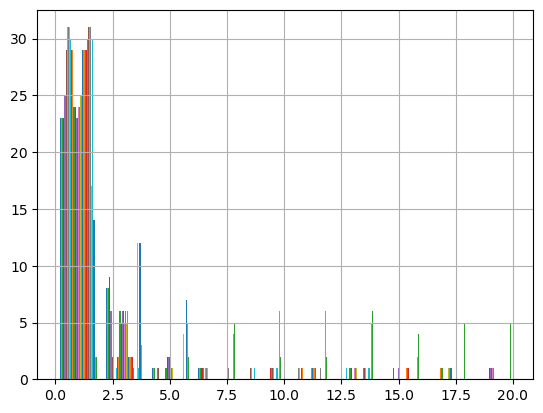

In [10]:
ost = (x-model.predict(yp))**2
plt.hist(ost)
plt.grid()

plt.show()

# Расскажем про Тест Колмогорова - Смирнова

In [11]:
ks_teor = """
Тест Колмогорова-Смирнова (или K-S тест) — это непараметрический статистический тест, применяемый для проверки соответствия распределения выборки заданному теоретическому распределению. Тест позволяет оценить, насколько эмпирическое распределение данных совпадает с нормальным распределением или с любым другим теоретическим распределением.

Основные этапы алгоритма теста Колмогорова-Смирнова:
Сбор данных. Получаем выборку, для которой нужно проверить соответствие распределению.

Определение теоретического распределения. Выбираем теоретическое распределение, с которым будем сравнивать данные (например, нормальное, равномерное и т.д.).

Построение эмпирической функции распределения (ЭФР):

Вычисляем кумулятивные частоты значений в выборке, чтобы построить эмпирическую функцию распределения.

Построение теоретической функции распределения (ТФР):

На основе выбранного теоретического распределения рассчитываем его кумулятивную функцию распределения для каждого значения в выборке.

Вычисление статистики Колмогорова-Смирнова:

Определяем максимальное отклонение между эмпирической и теоретической функциями распределения: D = max | F_эмп(x) - F_теор(x) |, где F_эмп(x) — значение эмпирической функции распределения, F_теор(x) — значение теоретической функции распределения для каждого значения x в выборке.

Сравнение с критическим значением:

Полученное значение D сравнивается с критическим значением для заданного уровня значимости (обычно 0,05 или 0,01), которое зависит от объема выборки.
Если D превышает критическое значение, гипотеза о совпадении распределений отклоняется.

Интерпретация результатов:

Если D меньше критического значения: гипотеза о том, что данные следуют теоретическому распределению, не отклоняется.
Если D больше критического значения: гипотеза о соответствии распределению отклоняется, что говорит о значительных отклонениях данных от выбранного распределения.

Тест Колмогорова-Смирнова часто используется для проверки нормальности и других распределений. Он также применим для двухвыборочного теста, когда нужно проверить, принадлежат ли две выборки одному и тому же распределению.
"""

# Jarque-Bera

In [12]:
jb_teor= '''

Тест Джарка-Бера (Jarque-Bera) — это статистический тест, используемый для проверки нормальности распределения данных. Он основывается на оценке асимметрии (сместности) и эксцесса (пиковости) распределения, чтобы определить, насколько распределение данных отличается от нормального.

Основные этапы алгоритма теста Джарка-Бера:
Сбор данных. Получаем выборку, для которой нужно проверить нормальность.

Вычисление параметров:

n: объем выборки.
Среднее значение выборки.
Стандартное отклонение выборки.


Рассчитываем асимметрию и эксцесс:

Асимметрия (skewness). Измеряет, насколько данные симметричны относительно среднего. Формула: S = (1/n) * сумма [(x_i - среднее) / стандартное отклонение]^3.
Эксцесс (kurtosis). Показывает, насколько распределение «пикообразно» или «плосковершинно». Формула: K = (1/n) * сумма [(x_i - среднее) / стандартное отклонение]^4 - 3.

Расчет статистики теста Джарка-Бера: JB = (n/6) * (S^2 + (K^2)/4). Чем больше значение JB, тем сильнее отклонение от нормальности.

Сравнение с критическим значением:

Полученное значение статистики JB сравнивается с критическим значением из распределения хи-квадрат с 2 степенями свободы на выбранном уровне значимости (обычно 0,05).

Если JB превышает критическое значение, то гипотеза нормальности отклоняется.

Интерпретация результатов:
Если JB меньше критического значения: гипотеза о нормальности не отклоняется, и можно предположить, что данные распределены нормально.
Если JB больше критического значения: гипотеза о нормальности отклоняется, что говорит о наличии значительной асимметрии или отклонений от нормальной формы распределения.

Этот тест полезен для предварительного анализа данных и проверки предположения о нормальности, что важно во многих статистических методах и эконометрических моделях.'''

In [13]:
jb_stat, jb_p_value = jarque_bera(model.resid)
print("Статистика Jarque-Bera:", jb_stat)


print("p-значение:", jb_p_value)

if jb_p_value < 0.05:
    print("Данные не распределены нормально")
else:
    print('Данные распределены нормально')

Статистика Jarque-Bera: 13.612102090400214
p-значение: 0.0011070559935375376
Данные не распределены нормально


# Shapiro-Wilk

In [14]:


stat, p_value = st.shapiro(model.resid)
print("Статистика Shapiro-Wilk:", stat)

print("p-значение:", p_value)


if p_value > 0.05:
    print("Распределение данных похоже на нормальное")

else:
    print('Распределение данных отличается от нормального')

Статистика Shapiro-Wilk: 0.9379269309553689
p-значение: 0.05914236479819749
Распределение данных похоже на нормальное


# Helwig

In [15]:
def helwig_test(data):
    # Шаг 1: Сортируем данные и определяем размер выборки
    data_sorted = np.sort(data)
    n = len(data)

    # Шаг 2: Оценка среднего и стандартного отклонения
    mean, std = np.mean(data), np.std(data, ddof=1)

    # Шаг 3: Вычисляем эмпирическую функцию распределения (ЭФР)
    ecdf = np.arange(1, n + 1) / n  

    # Шаг 4: Строим теоретическую нормальную функцию распределения (НФР)
    theoretical_cdf = st.norm.cdf(data_sorted, mean, std)

    # Шаг 5: Вычисляем максимальное отклонение между ЭФР и НФР
    max_deviation = np.max(np.abs(ecdf - theoretical_cdf))

    # Вывод результата
    
    print("Максимальное отклонение (D):", max_deviation)  
      
    return max_deviation

n = len(model.resid)

alpha = 0.05
critical_value = kstwobign.ppf(1 - alpha) / np.sqrt(n)
if helwig_test(model.resid) > critical_value:
    print(f"Гипотеза о нормальности отвергается на уровне значимости {alpha}.")
else:
    print(f"Нет оснований отвергнуть гипотезу о нормальности на уровне значимости {alpha}.")

Максимальное отклонение (D): 0.10170197485215082
Нет оснований отвергнуть гипотезу о нормальности на уровне значимости 0.05.


# Сравнение тестов

In [16]:
t = '''Сравнение методов согласия Хельвига, Шапиро-Вилька и Джарка-Бера (Jarque-Bera) полезно для выбора подходящего теста для проверки нормальности распределения данных. Каждый из этих методов имеет свою область применения и особенности, которые могут быть полезны в разных контекстах.

1. Тест Хельвига
Цель: Метод Хельвига основан на анализе корреляций и используется для оценки согласия признаков, особенно в социально-экономических и психометрических исследованиях.
Применение: Обычно применяется для оценки многомерного согласия признаков или при проведении факторного анализа.
Преимущества:
Хорошо подходит для многомерных данных, поскольку анализирует согласие между несколькими переменными.
Позволяет оценить общую структуру корреляций между признаками, что важно для анализа взаимозависимости.
Недостатки:
Не подходит для проверки нормальности распределения данных.
Может требовать больших выборок для корректного анализа многомерных данных.

2. Тест Шапиро-Вилька
Цель: Проверка нормальности распределения данных в выборке.
Применение: Часто используется для малых и средних выборок (до 2000 наблюдений), чтобы оценить, насколько распределение данных близко к нормальному.
Преимущества:
Очень чувствителен к отклонениям от нормальности, особенно в малых выборках.
Является одним из самых мощных тестов для проверки нормальности, так как учитывает порядок значений в выборке.
Недостатки:
Может давать ложные результаты для больших выборок (более 2000 наблюдений), так как становится излишне чувствительным к малейшим отклонениям.
Не подходит для многомерных данных, так как используется для одномерного распределения.

3. Тест Джарка-Бера (Jarque-Bera)
Цель: Проверка нормальности распределения путем оценки асимметрии (skewness) и эксцесса (kurtosis).
Применение: Часто применяется для данных больших объемов, особенно в эконометрических и финансовых исследованиях.
Преимущества:
Хорошо подходит для больших выборок, так как рассчитывается на основе асимметрии и эксцесса, которые более устойчивы в больших объемах данных.
Удобен для случаев, когда нужны простые показатели нормальности (асимметрия и эксцесс).
Недостатки:
Менее чувствителен для малых выборок, так как асимметрия и эксцесс могут быть нестабильными.
Не учитывает порядок значений в выборке, что делает его менее точным для малых выборок.

Вывод:
Для малых выборок (до 2000 наблюдений) тест Шапиро-Вилька наиболее подходит для проверки нормальности, поскольку он высокочувствителен к отклонениям и учитывает порядок значений.
Для больших выборок (более 2000 наблюдений) тест Джарка-Бера предпочтителен, так как он основан на асимметрии и эксцессе, что стабильно в больших объемах данных.
Тест Хельвига лучше использовать, когда требуется оценить согласие нескольких переменных, а не нормальность, так как он лучше подходит для анализа многомерных зависимостей.
Таким образом, выбор метода зависит от цели исследования, объема выборки и характеристик данных.'''

print(t)

Сравнение методов согласия Хельвига, Шапиро-Вилька и Джарка-Бера (Jarque-Bera) полезно для выбора подходящего теста для проверки нормальности распределения данных. Каждый из этих методов имеет свою область применения и особенности, которые могут быть полезны в разных контекстах.

1. Тест Хельвига
Цель: Метод Хельвига основан на анализе корреляций и используется для оценки согласия признаков, особенно в социально-экономических и психометрических исследованиях.
Применение: Обычно применяется для оценки многомерного согласия признаков или при проведении факторного анализа.
Преимущества:
Хорошо подходит для многомерных данных, поскольку анализирует согласие между несколькими переменными.
Позволяет оценить общую структуру корреляций между признаками, что важно для анализа взаимозависимости.
Недостатки:
Не подходит для проверки нормальности распределения данных.
Может требовать больших выборок для корректного анализа многомерных данных.

2. Тест Шапиро-Вилька
Цель: Проверка нормальности расп

# Для pract 5

## 1. Представить наилучшую модель Филлипса 

In [24]:
model.summary()
X = model.model.exog
Y = model.model.endog
X

array([[ 1.00000000e+00, -1.24817494e+00,  1.55794067e+00,
        -1.94458250e+00,  2.42717914e+00, -3.02954416e+00,
         3.78140109e+00, -4.71985007e+00,  5.89119856e+00,
        -7.35324639e+00,  9.17813784e+00, -1.14559216e+01,
         1.42989942e+01, -1.78476462e+01,  2.22769847e+01,
        -2.78055739e+01,  3.47062205e+01, -4.33194345e+01,
         5.40702324e+01, -6.74891089e+01,  8.42382142e+01,
        -1.05144028e+02,  1.31238140e+02],
       [ 1.00000000e+00, -1.19421216e+00,  1.42614267e+00,
        -1.70311691e+00,  2.03388292e+00, -2.42888771e+00,
         2.90060722e+00, -3.46394040e+00,  4.13667973e+00,
        -4.94007322e+00,  5.89949549e+00, -7.04524922e+00,
         8.41352226e+00, -1.00475305e+01,  1.19988831e+01,
        -1.43292121e+01,  1.71121192e+01, -2.04355008e+01,
         2.44043234e+01, -2.91439397e+01,  3.48040470e+01,
        -4.15634160e+01,  4.96355366e+01],
       [ 1.00000000e+00, -1.16183448e+00,  1.34985935e+00,
        -1.56831313e+00,  1.8

## 2. Провести тесты на автокорреляцию (графический, метод рядов, критерий Дарбина-Уотсона, коэффициент автокорреляции) (на уровне значимости 0,05)

### Графический тест

Сильная автокорреляция на малых лагах (например, на лаге 1) может указывать на зависимость между соседними значениями остатков. Это может свидетельствовать о недоучтенных временных зависимостях, что нарушает предположение о независимости остатков в регрессионной модели.

Все значения ACF в пределах доверительных интервалов вокруг нуля предполагают, что остатковая автокорреляция отсутствует, и остатки можно считать независимыми. Доверительный интервал строится для того, чтобы учесть случайные колебания.

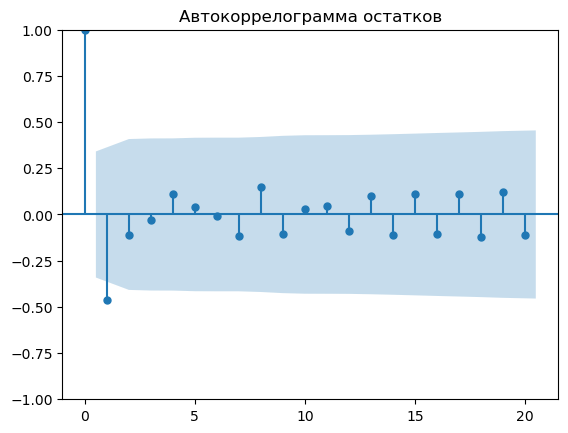

In [18]:
residuals = model.resid

graphics.tsa.plot_acf(residuals, lags=20)
plt.title("Автокоррелограмма остатков")
plt.show()


### Метод рядов

Метод рядов (или тест серий) — это статистический тест, который проверяет случайность последовательности данных, таких как остатки модели. Этот тест определяет, есть ли в последовательности какие-то паттерны, что может указывать на автокорреляцию.

#### Основная идея метода рядов
Метод рядов анализирует последовательность знаков (положительных и отрицательных) остатков модели, определяя так называемые **ряды**. Ряд — это последовательность положительных или отрицательных остатков, которая заканчивается, когда знак остатка меняется. Если остатки действительно случайны и независимы, то количество таких рядов в последовательности будет приближаться к случайному значению, определяемому теорией вероятностей.

#### Как работает метод рядов?
1. **Определение рядов**: Последовательность остатков разделяется на ряды, которые представляют собой непрерывные участки положительных или отрицательных значений. Например, если последовательность остатков выглядит так: `[+, +, -, -, +, -]`, то в ней 4 ряда (2 положительных и 2 отрицательных).

2. **Подсчет числа рядов**: Подсчитывается общее количество рядов и количество положительных и отрицательных остатков.

3. **Проверка случайности**: На основе числа положительных и отрицательных рядов можно вычислить ожидаемое количество рядов при условии, что остатки независимы. Затем сравнивается фактическое количество рядов с ожидаемым. 

4. **Выводы**: Если фактическое количество рядов значительно отличается от ожидаемого, можно предположить, что остатки не случайны и в них присутствует автокорреляция.

#### Формула метода рядов
Для последовательности длиной $ N $ с $ N_+ $ положительными и $ N_- $ отрицательными значениями, ожидаемое количество рядов $ E(R) $ вычисляется как:
$
E(R) = \frac{2N_+N_-}{N} + 1
$
Дисперсия количества рядов $ \text{Var}(R) $ рассчитывается как:
$
\text{Var}(R) = \frac{2N_+N_-(2N_+N_- - N)}{N^2(N - 1)}
$
Для проверки гипотезы используется нормализированная статистика:
$
Z = \frac{R - E(R)}{\sqrt{\text{Var}(R)}}
$
Если $ |Z| $ больше критического значения нормального распределения (например, 1.96 при уровне значимости 0,05), гипотеза о случайности отклоняется.

#### Интерпретация
- Если гипотеза о случайности **отклоняется**, это говорит о наличии автокорреляции в остатках.
- Если гипотеза о случайности **не отклоняется**, можно считать, что остатки случайны и независимы.

Метод рядов помогает быстро оценить, нарушено ли предположение о случайности остатков, что может указывать на недостатки модели или необходимость ее уточнения.

In [19]:
from scipy.stats import norm

# Остатки модели
residuals = model.resid

# Определение знаков
signs = np.sign(residuals)

# Подсчет положительных и отрицательных остатков
N_plus = np.sum(signs > 0)
N_minus = np.sum(signs < 0)
N = N_plus + N_minus

# Подсчет числа рядов
runs = 1 + np.sum(signs[1:] != signs[:-1])

# Ожидаемое количество рядов и дисперсия
E_R = (2 * N_plus * N_minus) / N + 1
Var_R = (2 * N_plus * N_minus * (2 * N_plus * N_minus - N)) / (N**2 * (N - 1))

# Статистика Z
Z = (runs - E_R) / np.sqrt(Var_R)

# Проверка гипотезы
alpha = 0.05
critical_value = norm.ppf(1 - alpha / 2)

if abs(Z) > critical_value:
    print("Гипотеза о случайности отклоняется, присутствует автокорреляция.")
else:
    print("Гипотеза о случайности не отклоняется, автокорреляции нет.")

Гипотеза о случайности отклоняется, присутствует автокорреляция.


### Критерий Дарбина-Уотсона

Критерий Дарбина-Уотсона (DW) — это статистический тест, который проверяет наличие автокорреляции первого порядка в остатках линейной регрессионной модели. Автокорреляция остатков может указывать на то, что модель не учла какую-то структуру в данных, что может снизить точность прогнозов и валидность выводов.

#### Основная идея критерия Дарбина-Уотсона
Критерий Дарбина-Уотсона определяет, насколько остатки $ e_t $ в модели связаны со значениями на предыдущих шагах $ e_{t-1} $. Если остатки модели являются случайными (без автокорреляции), их значения на разных шагах времени должны быть независимы друг от друга.

#### Формула критерия Дарбина-Уотсона
Статистика Дарбина-Уотсона $ d $ вычисляется по формуле:

$
d = \frac{\sum_{t=2}^{T} (e_t - e_{t-1})^2}{\sum_{t=1}^{T} e_t^2}
$

где:
- $ e_t $ — остаток (ошибка) модели на шаге $ t $,
- $ T $ — общее количество наблюдений.

Значение $ d $ находится в диапазоне от 0 до 4.

#### Интерпретация значения $ d $
- **Если $ d \approx 2 $**: Это означает, что автокорреляция отсутствует, остатки случайны.
- **Если $ d < 2 $**: Есть положительная автокорреляция, т.е. положительные остатки с большей вероятностью следуют за положительными, а отрицательные за отрицательными.
- **Если $ d > 2 $**: Есть отрицательная автокорреляция, когда положительные и отрицательные значения чередуются чаще, чем это было бы случайно.

#### Критические значения
Для теста на значимость используется таблица критических значений $ d_L $ и $ d_U $ (нижнего и верхнего порогов), которые зависят от числа наблюдений и количества регрессоров. Интерпретация:
- **$ d < d_L $**: Наблюдается значительная положительная автокорреляция.
- **$ d > 4 - d_L $**: Наблюдается значительная отрицательная автокорреляция.
- **$ d_U < d < 4 - d_U $**: Автокорреляции нет.
- **$ d_L \leq d \leq d_U $** или **$ 4 - d_U \leq d \leq 4 - d_L $**: Результат не определен, и требуется дополнительная проверка.


#### Пример интерпретации
1. **Если $ dw\_stat \approx 2 $**: Остатки случайны, автокорреляции нет, и модель хорошо описывает данные.
2. **Если $ dw\_stat < 2 $**: Положительная автокорреляция. Это может означать, что модель не учла какие-то временные зависимости, и можно рассмотреть модели, учитывающие структуру автокорреляции (например, авторегрессионные модели).
3. **Если $ dw\_stat > 2 $**: Отрицательная автокорреляция. Это редко встречается в эконометрических данных, но может наблюдаться в некоторых временных рядах, где данные колеблются вокруг среднего значения.

Критерий Дарбина-Уотсона позволяет выявить автокорреляцию в остатках модели, помогая оценить качество регрессионной модели и понять, требуется ли добавить дополнительные переменные или перестроить модель.

In [20]:
dw_stat = stats.durbin_watson(residuals)
print(f"Статистика Дарбина-Уотсона: {dw_stat}")

if dw_stat == 2:
    print('Остатки случайны, автокорреляции нет, и модель хорошо описывает данные.')
elif dw_stat < 2:
    print('Положительная автокорреляция. Это может означать, что модель не учла какие-то временные зависимости, и можно рассмотреть модели, учитывающие структуру автокорреляции (например, авторегрессионные модели)')
else:
    print('Отрицательная автокорреляция. Это редко встречается в эконометрических данных, но может наблюдаться в некоторых временных рядах, где данные колеблются вокруг среднего значения.')

Статистика Дарбина-Уотсона: 2.9287828239715754
Отрицательная автокорреляция. Это редко встречается в эконометрических данных, но может наблюдаться в некоторых временных рядах, где данные колеблются вокруг среднего значения.


### Коэффициент автокорреляции

Коэффициенты автокорреляции (ACF, **Autocorrelation Function**) измеряют, насколько текущие значения временного ряда зависят от его прошлых значений на разных **лагах** (шагов смещения во времени). Они показывают степень корреляции между значениями ряда на разных временных интервалах, помогая понять наличие и характер временных зависимостей.

#### Как рассчитываются коэффициенты автокорреляции?
Для временного ряда $ y_t $ коэффициент автокорреляции на лаге $ k $ ($ \rho_k $) можно рассчитать следующим образом:

$
\rho_k = \frac{\sum_{t=k+1}^{T} (y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{T} (y_t - \bar{y})^2}
$

где:
- $ y_t $ — значение временного ряда в момент времени $ t $,
- $ \bar{y} $ — среднее значение временного ряда,
- $ T $ — общее количество наблюдений,
- $ k $ — лаг.

#### Интерпретация коэффициентов автокорреляции
1. **Если $ \rho_k \approx 0 $** на всех лагах $ k $, это говорит о том, что значения временного ряда не зависят от предыдущих значений, и остатки случайны. Такой временной ряд не содержит автокорреляции.
   
2. **Если $ \rho_k > 0 $** на малых значениях $ k $ (например, $ k = 1, 2, 3 $), то в данных присутствует **положительная автокорреляция**. Это означает, что высокие значения ряда (например, большие остатки) с большей вероятностью следуют за высокими значениями, а низкие значения — за низкими.

3. **Если $ \rho_k < 0 $** на малых значениях $ k $, это указывает на **отрицательную автокорреляцию**, когда значения временного ряда чередуются — высокое значение имеет тенденцию следовать за низким, и наоборот.

4. **Постепенное затухание автокорреляции** (медленное снижение значений $ \rho_k $) на больших лагах может свидетельствовать о наличии долгосрочной структуры или сезонности в данных.



#### Как использовать ACF на практике?
1. **Оценка случайности остатков**: Если остатки модели не автокоррелированы, большинство значений ACF для остатков будут находиться внутри доверительных интервалов.
  
2. **Выбор модели временного ряда**: ACF помогает определить подходящую модель для анализа временных рядов. Например:
   - Если автокорреляция значима только на первом лаге, можно рассмотреть модель AR(1).
   - Если автокорреляция затухает медленно, возможны сложные модели, такие как ARIMA.

3. **Выявление сезонности**: Если наблюдаются пики автокорреляции через регулярные интервалы, это может указывать на сезонность.

Коэффициенты автокорреляции являются важным инструментом в анализе временных рядов, позволяя глубже понять их структуру и выявить возможные временные зависимости.

In [21]:
acf_values = tsa.acf(residuals, fft=False)
print("Коэффициенты автокорреляции (ACF):", acf_values)

Коэффициенты автокорреляции (ACF): [ 1.         -0.46439328 -0.10900655 -0.03222888  0.10946437  0.04097332
 -0.0063266  -0.11617577  0.14951831 -0.10798967  0.02859035  0.04534351
 -0.08725326  0.10174317 -0.10903346  0.11212918]


Чтобы интерпретировать этот ряд коэффициентов автокорреляции (ACF), нужно рассмотреть значения автокорреляций на каждом лаге и понять, есть ли какие-то значимые паттерны, указывающие на структуру временных зависимостей в данных.

#### Интерпретация коэффициентов автокорреляции:
1. **Лаг 0**: Коэффициент автокорреляции равен 1.0, так как это корреляция ряда с самим собой. Это значение всегда равно 1 и используется в качестве отправной точки для сравнения следующих лагов.

2. **Лаг 1**: Коэффициент автокорреляции составляет $-0.46$. Значительное отрицательное значение на первом лаге указывает на сильную **отрицательную автокорреляцию**. Это означает, что значения временного ряда имеют тенденцию чередоваться: высокие значения следуют за низкими, и наоборот. Такая структура автокорреляции характерна для данных, в которых присутствует "чередование" значений.

3. **Лаги 2–3**: Коэффициенты $0.109$ и $-0.032$ показывают некоторую слабую положительную и отрицательную автокорреляцию на втором и третьем лагах. Это может указывать на краткосрочные паттерны или на то, что влияние автокорреляции быстро затухает после первого лага.

4. **Небольшие колебания на больших лагах**: Некоторые лаги имеют небольшие значения автокорреляции, как, например, $0.041$ на шестом лаге и $-0.109$ на 15-м лаге. Такие значения в пределах доверительного интервала, вероятно, не значимы и могут быть случайными. В целом, это свидетельствует о том, что временная зависимость в остатках после третьего лага отсутствует.

#### Итоговая интерпретация:
- **Основная автокорреляция** в этом ряду сосредоточена на первом лаге с сильным отрицательным значением, что указывает на чередование значений. Возможно, моделью не учтена какая-то структура, которая приводит к такой автокорреляции.
- **Быстрое затухание автокорреляции после первых нескольких лагов** говорит о том, что зависимость между значениями временного ряда исчезает довольно быстро.

## 3.  Построить авторересионную схему 1-ого порядка AR(1) (определив коэффициент авторегрессии с помощью: Дарбина-Уотсона, методами: Кохрейна-Оркатта, Хилдрета -Лу)

### Метод Хилдрета-Лу

Метод Хилдрета-Лу — это один из способов корректировки регрессионной модели, если в её остатках присутствует автокорреляция первого порядка. Этот метод, в отличие от метода Кохрейна-Оркатта, не является итерационным, а представляет собой метод подбора параметра автокорреляции $\rho$ для корректировки модели.

#### Основная идея метода Хилдрета-Лу
Метод Хилдрета-Лу заключается в том, чтобы перебором найти такое значение параметра $\rho$, которое минимизирует сумму квадратов преобразованных остатков. Метод используется для устранения автокорреляции первого порядка, когда она выражается через авторегрессионное уравнение:

$
e_t = \rho e_{t-1} + u_t
$

где $ e_t $ — остаток модели в момент времени $ t $, $ \rho $ — коэффициент автокорреляции, который подбирается, и $ u_t $ — белый шум.

#### Пошаговый алгоритм метода Хилдрета-Лу

1. **Выбор диапазона значений для $\rho$**: Определяется диапазон возможных значений для $\rho$, например от -1 до 1, с шагом (например, 0.01 или 0.05).

2. **Трансформация данных**: Для каждого значения $\rho$ в этом диапазоне преобразовывают зависимую переменную $ Y_t $ и независимые переменные $ X_t $ по следующей схеме:
   - $ Y_t' = Y_t - \rho Y_{t-1} $
   - $ X_t' = X_t - \rho X_{t-1} $
   
3. **Построение регрессии на преобразованных данных**: Оценивается регрессия для каждой пары $ Y_t' $ и $ X_t' $ для каждого значения $\rho$ в выбранном диапазоне. На каждом шаге сохраняется сумма квадратов остатков.

4. **Выбор оптимального $\rho$**: Оптимальным значением $\rho$ считается то, которое минимизирует сумму квадратов преобразованных остатков.

5. **Окончательная оценка модели**: После определения оптимального значения $\rho$ выполняется окончательная оценка регрессионной модели с применением найденного коэффициента автокорреляции.


#### Преимущества и недостатки метода Хилдрета-Лу

- **Преимущества**:
  - Простота реализации, поскольку не требует итераций после нахождения оптимального $\rho$.
  - Подходит для моделей, где автокорреляция первого порядка выражена, и есть уверенность в выборе диапазона значений $\rho$.

- **Недостатки**:
  - Зависимость от выбора диапазона $\rho$: если диапазон выбран неправильно, решение может оказаться неэффективным.
  - Метод предполагает линейную автокорреляцию только первого порядка и может оказаться менее точным, если данные имеют более сложные временные зависимости.

#### Заключение
Метод Хилдрета-Лу — это простой и понятный способ устранения автокорреляции первого порядка. Он подходит для моделей, где предположение об автокорреляции первого порядка обосновано. Однако точность метода сильно зависит от выбора диапазона и шага изменения $\rho$, что может потребовать дополнительных проверок на практике.

In [22]:
X = model.model.exog
Y = model.model.endog

# Задаем диапазон значений для rho
rho_values = np.arange(-1, 1, 0.01)
best_rho = None
min_rss = float('inf')

# Перебор значений rho
for rho in rho_values:
    # Преобразуем данные
    Y_transformed = Y[1:] - rho * Y[:-1]
    X_transformed = X[1:] - rho * X[:-1]
    
    # Строим регрессию на преобразованных данных
    model1 = OLS(Y_transformed, X_transformed).fit()
    rss = sum(model1.resid**2)  # Сумма квадратов остатков
    
    # Проверка, минимизирует ли текущее rho сумму квадратов остатков
    if rss < min_rss:
        min_rss = rss
        best_rho = rho

# Окончательная оценка модели с оптимальным значением rho
Y_transformed = Y[1:] - best_rho * Y[:-1]
X_transformed = X[1:] - best_rho * X[:-1]
final_model = OLS(Y_transformed, X_transformed).fit()

print("Коэффициенты модели:", final_model.params)
print("Оптимальное значение rho:", best_rho)

Коэффициенты модели: [ 7.65264085e-01 -6.74605438e-01  1.02809744e+00  5.29843488e+00
 -3.18453573e+01 -4.08632134e+01  3.19900132e+02  7.37617258e+01
 -1.41969984e+03  2.80812395e+02  3.30437375e+03 -1.38397313e+03
 -4.43978108e+03  2.51855767e+03  3.52678958e+03 -2.47790861e+03
 -1.57158533e+03  1.39632707e+03  3.05478597e+02 -4.25623446e+02
  1.57753099e+01  5.46151437e+01 -1.13058863e+01]
Оптимальное значение rho: -0.5099999999999996


Оптимальное значение $\rho = -0.51$, полученное по методу Хилдрета-Лу, указывает на **отрицательную автокорреляцию** остатков в регрессионной модели. Это означает, что если остаток в одном периоде высок, то в следующем он, вероятно, будет низким, и наоборот. Такая чередующаяся зависимость между остатками свидетельствует о том, что в данных присутствует цикличность или "отскакивающий" паттерн, когда изменения в одну сторону сменяются изменениями в противоположную сторону.

#### Выводы и интерпретация
1. **Чередующаяся зависимость**: Отрицательная автокорреляция (-0.51) говорит о том, что в остатках присутствует заметная чередующаяся зависимость. Это часто встречается в данных с сезонными или цикличными паттернами, где наблюдаются регулярные изменения, которые "сглаживают" друг друга.

2. **Эффективность корректировки**: Теперь, с учетом найденного значения $\rho$, модель скорректирована таким образом, чтобы устранить автокорреляцию остатков первого порядка. Это должно повысить надежность коэффициентов регрессии, так как больше не будет систематической зависимости в остатках, что устраняет одну из потенциальных проблем модели.

3. **Рекомендации**: Отрицательная автокорреляция в остатках может сигнализировать о недоучтенных сезонных эффектах или других временных факторах. Если это применимо к данным, стоит рассмотреть добавление переменных, отражающих сезонные или временные колебания, чтобы дополнительно повысить точность модели.

### Метод Кохрейна-Оркатта

Метод Кохрейна-Оркатта — это итерационный метод, который применяется для устранения автокорреляции первого порядка в регрессионных моделях. Он используется, когда остатки модели демонстрируют положительную автокорреляцию, и позволяет скорректировать параметры модели, чтобы сделать её более точной и избавить от автокорреляции.

#### Основная идея метода Кохрейна-Оркатта
Метод Кохрейна-Оркатта заключается в преобразовании исходной модели так, чтобы устранить автокорреляцию в остатках. Он предполагает, что остатки модели $ e_t $ связаны по схеме авторегрессии первого порядка (AR(1)):

$
e_t = \rho e_{t-1} + u_t
$

где:
- $ \rho $ — коэффициент автокорреляции, который нужно оценить,
- $ u_t $ — белый шум, который является случайным и независимым от предыдущих значений.

Метод Кохрейна-Оркатта трансформирует исходные уравнения регрессии таким образом, чтобы устранить автокорреляцию остатков.

#### Пошаговый алгоритм метода Кохрейна-Оркатта

1. **Оценка исходной модели**: Построить исходную регрессионную модель и рассчитать коэффициент автокорреляции первого порядка $ \rho $ с помощью, например, критерия Дарбина-Уотсона или автокоррелограммы.

2. **Трансформация переменных**: Применить следующую трансформацию к каждому уравнению модели:
   - Для зависимой переменной $ Y_t $: $ Y_t' = Y_t - \rho Y_{t-1} $
   - Для каждой независимой переменной $ X_t $: $ X_t' = X_t - \rho X_{t-1} $
   
   В результате получается уравнение для преобразованных переменных:
   
   $
   Y_t' = \beta_0 (1 - \rho) + \beta_1 X_t' + \varepsilon_t'
   $

3. **Переоценка модели**: Построить регрессионную модель на основе преобразованных переменных $ Y_t' $ и $ X_t' $ и найти новые оценки коэффициентов.

4. **Итерация**: Пересчитать коэффициент автокорреляции $ \rho $ на основе новых остатков и повторить шаги 2 и 3, пока значения коэффициентов не перестанут значительно изменяться.

#### Преимущества и недостатки метода Кохрейна-Оркатта
- **Преимущества**:
  - Позволяет избавиться от автокорреляции первого порядка, улучшая точность модели.
  - Метод прост в реализации и подходит для небольших наборов данных с автокорреляцией первого порядка.

- **Недостатки**:
  - Требует многократных итераций, которые могут быть ресурсоемкими.
  - Если автокорреляция в данных не ограничивается первым порядком, метод может быть менее эффективен.

#### Заключение
Метод Кохрейна-Оркатта помогает эффективно скорректировать модель, если в данных присутствует автокорреляция первого порядка. Благодаря итеративной процедуре и трансформации переменных метод устраняет временную зависимость остатков, делая модель более корректной.

In [23]:
r = 1 - dw_stat/2

X = model.model.exog
Y = model.model.endog

model1 = OLS(Y, X).fit()
residuals = model1.resid

# Шаг 2: Оценка коэффициента автокорреляции
rho = np.corrcoef(residuals[1:], residuals[:-1])[0, 1]

# Итерационный процесс
for _ in range(10):  # Максимум 10 итераций, можно остановиться раньше, если разница мала
    Y_transformed = Y[1:] - rho * Y[:-1]
    X_transformed = X[1:] - rho * X[:-1]

    # Переоценка модели на преобразованных данных
    model1 = OLS(Y_transformed, X_transformed).fit()
    residuals = model1.resid

    # Обновляем rho и проверяем условие остановки
    new_rho = np.corrcoef(residuals[1:], residuals[:-1])[0, 1]
    if abs(new_rho - rho) < 1e-5:  # Условие остановки
        break
    rho = new_rho

print("Оцененные коэффициенты модели:", model.params)
print("Коэффициент автокорреляции rho:", rho)

Оцененные коэффициенты модели: [ 7.68461347e-01 -5.98785515e-01  5.50558887e-01  2.65438521e+00
 -2.18490594e+01 -1.28174153e+01  2.38361632e+02 -5.84568767e+01
 -1.07466615e+03  5.98306122e+02  2.45232671e+03 -1.76929148e+03
 -3.15080947e+03  2.67451138e+03  2.32640617e+03 -2.32639932e+03
 -9.12252427e+02  1.17956004e+03  1.20088519e+02 -3.24697080e+02
  2.94328117e+01  3.75550910e+01 -8.46398095e+00]
Коэффициент автокорреляции rho: -0.3343837853352638


Коэффициент автокорреляции $\rho = -0.334$, полученный по методу Кохрейна-Оркатта, также указывает на **отрицательную автокорреляцию** в остатках модели, но с меньшей величиной автокорреляции по сравнению с предыдущим результатом (-0.51 по методу Хилдрета-Лу).

#### Выводы и интерпретация:

1. **Отрицательная автокорреляция**: Значение $\rho = -0.334$ подтверждает, что остатки модели имеют отрицательную автокорреляцию. Это означает, что высокие значения остатков с большой вероятностью будут следовать за низкими значениями и наоборот. Такая динамика может свидетельствовать о наличии цикличных или колеблющихся паттернов в данных.

2. **Сравнение с методом Хилдрета-Лу**: Полученное значение $\rho$ по методу Кохрейна-Оркатта ($-0.334$) несколько меньше, чем по методу Хилдрета-Лу ($-0.51$). Это может означать, что подходы к оценке автокорреляции дали немного разные результаты, что является нормальной ситуацией в эконометрике, поскольку оба метода имеют свои особенности и нюансы.

3. **Корректировка модели**: В обоих случаях, с учетом автокорреляции в остатках, корректировка модели (например, с использованием авторегрессионных моделей или модели ARIMA) будет полезной для улучшения точности предсказаний. 

4. **Уровень автокорреляции**: Значение $\rho = -0.334$ не слишком велико, но оно указывает на заметную автокорреляцию, которую стоит учитывать при дальнейшей обработке данных. Это значение подтверждает, что в данных есть некоторый циклический характер, но автокорреляция достаточно умеренная.


Таким образом, коэффициент $\rho = -0.334$ подтверждает наличие отрицательной автокорреляции в данных, и для повышения точности модели стоит рассматривать корректировки и учет этих временных зависимостей.